In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range =  0.2,horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale = 1./255)

In [3]:
x_train = train_datagen.flow_from_directory("dataset/train_set",
                                            target_size = (64,64),
                                            batch_size = 32 ,  
                                            class_mode  = "categorical")
x_test  = test_datagen.flow_from_directory("dataset/test_set",
                                           target_size = (64,64),
                                           batch_size = 32 ,  
                                           class_mode  = "categorical")

Found 359 images belonging to 5 classes.
Found 159 images belonging to 5 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [24]:
#help(Convolution2D)

In [6]:
model=Sequential()

In [7]:
model.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation = 'relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
#input layer
model.add(Flatten())

In [25]:
#help(Dense)

In [11]:
#hidden layers
model.add(Dense(activation='relu',units=500))

In [12]:
model.add(Dense(activation='softmax',units=5))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit_generator(x_train,steps_per_epoch = 10,epochs=60,validation_data = x_test,validation_steps = 5)

Epoch 1/60
10/10 [==============================] - 2s 241ms/step - loss: 1.5725 - accuracy: 0.3153 - val_loss: 1.5410 - val_accuracy: 0.4780
Epoch 2/60
10/10 [==============================] - 2s 241ms/step - loss: 1.5244 - accuracy: 0.4313 - val_loss: 1.4606 - val_accuracy: 0.4214
Epoch 3/60
10/10 [==============================] - 2s 223ms/step - loss: 1.4766 - accuracy: 0.3898 - val_loss: 1.3626 - val_accuracy: 0.4717
Epoch 4/60
10/10 [==============================] - 2s 242ms/step - loss: 1.4048 - accuracy: 0.4500 - val_loss: 1.2542 - val_accuracy: 0.5660
Epoch 5/60
10/10 [==============================] - 2s 226ms/step - loss: 1.3557 - accuracy: 0.4441 - val_loss: 1.1825 - val_accuracy: 0.5346
Epoch 6/60
10/10 [==============================] - 2s 231ms/step - loss: 1.2513 - accuracy: 0.4746 - val_loss: 1.1393 - val_accuracy: 0.5472
Epoch 7/60
10/10 [==============================] - 2s 223ms/step - loss: 1.2359 - accuracy: 0.5356 - val_loss: 1.0809 - val_accuracy: 0.5723
Epoch 

In [15]:
model.save("skindisease.h5")

In [16]:
print(x_train.class_indices)

{'Acne': 0, 'Melanoma': 1, 'Peeling skin': 2, 'Ring worm': 3, 'Vitiligo': 4}


In [17]:
labels_dict = {0:'Acne', 1 : 'Melanoma', 2 : 'Peeling skin', 3 : 'Ring worm', 4 : 'Vitiligo'}

In [18]:
test_img_path = "dataset/download.jpg"

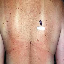

In [19]:
from keras.preprocessing import image
new_image = image.load_img(test_img_path, target_size = (64, 64))
new_image


In [20]:
import numpy as np
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)

In [21]:
result = model.predict(new_image)
result

array([[0.0000000e+00, 2.5233194e-30, 0.0000000e+00, 9.5503590e-33,
        1.0000000e+00]], dtype=float32)

In [22]:
label=np.argmax(result,axis=1)[0]
labels_dict[label]

'Vitiligo'